# Question 3 : Does the Complaint Type that you identified in response to Question 1 have an obvious relationship with any particular characteristic or characteristic of the Houses?

# Table of content
    1.Data Processing 
    2.Finding the relationship of Top_Complaint type with any particular characteristic of the Houses
        a.Visual analysis
        b.Statistical analysis
    3.Conclusion

## Data Processing

In [4]:
# Importing libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mlt
import matplotlib.pyplot as plt
from scipy import stats as stat

In [5]:
# Gathering needed data
columns_selected  = ['borough','city','complaint_type','incident_address','location_type','street_name','unique_key']
df_hpd = pd.read_csv('311.csv',usecols=columns_selected)
df_hpd.head(5)
df_hpd.shape

(5892615, 7)

In [6]:
# To get features of buildings need to merge HPD data set with PLUTO building features
# From PLUTO we will be using BRONX data set building features and test this with Top_Complaint in HPD dataset
# and find any relation ship among them
# Gathering BRONX values from HPD data set
df_hpd_bronx = df_hpd[df_hpd['borough']=='BRONX'].reset_index(drop=True)


In [7]:
# Processing PLUTO BRONX data set
# Selecting needed columns
columns_selected1 = ['Address','BldgArea','BldgDepth','BuiltFAR','CommFAR','FacilFAR','Lot','LotArea',
                     'LotDepth','NumBldgs','NumFloors','OfficeArea','ResArea','ResidFAR','RetailArea',
                     'YearBuilt','YearAlter1']
df_pluto_bronx=pd.read_csv('/Users/vba/Documents/BX_18v1.csv',usecols=columns_selected1)
df_pluto_bronx.head(2)
#df_pluto_bronx.info()

,Lot,Address,LotArea,BldgArea,ResArea,OfficeArea,RetailArea,NumBldgs,NumFloors,LotDepth,BldgDepth,YearBuilt,YearAlter1,BuiltFAR,ResidFAR,CommFAR,FacilFAR
0,1,122 BRUCKNER BOULEVARD,15000,0,0,0,0,1,0.0,200.0,0.0,0,0,0.00,6.02,5.0,6.5
1,4,126 BRUCKNER BOULEVARD,13770,752,0,272,0,2,1.0,100.0,16.0,1931,1994,0.05,6.02,5.0,6.5


In [8]:
# PLUTO data set had huge variation of data among diffrent columns
# Lets normalize the future set of PLUTO_BRONX before merging with HPD_BRONX
# Diffrent methods to normalize data,since PLUTO had features of continous variables we will use min/max method here
# Normalizing PLUTO data set
print('Data before Normalizing')
print(df_pluto_bronx.head(1))
# Skipping address column which is str type we normalization rest of the columns in PLUTO data set.
columns_selected2 = ['Address','BldgArea','BldgDepth','BuiltFAR','CommFAR','FacilFAR','Lot','LotArea',
                     'LotDepth','NumBldgs','NumFloors','OfficeArea','ResArea','ResidFAR','RetailArea',
                     'YearBuilt','YearAlter1']
df_pluto_bronx1= pd.read_csv('/Users/vba/Documents/BX_18v1.csv',usecols=columns_selected2)
# Replacing each column value in PLUTO_BRONX data set with normalized data using my defined formula
for i in df_pluto_bronx1[['BldgArea','BldgDepth','BuiltFAR','CommFAR','FacilFAR','Lot','LotArea',
                     'LotDepth','NumBldgs','NumFloors','OfficeArea','ResArea','ResidFAR','RetailArea',
                     'YearBuilt','YearAlter1']]:
    df_pluto_bronx1[i] = (df_pluto_bronx1[i]-df_pluto_bronx1[i].min())/(df_pluto_bronx1[i].max()-df_pluto_bronx1[i].min())
#Priting Normalized data set PLUTO_BRONX
print('Data after Normalizing')
print(df_pluto_bronx1.head(1))
print(df_pluto_bronx1.info())


Data before Normalizing
   Lot                 Address  LotArea  BldgArea  ResArea  OfficeArea  \
0    1  122 BRUCKNER BOULEVARD    15000         0        0           0   

   RetailArea  NumBldgs  NumFloors  LotDepth  BldgDepth  YearBuilt  \
0           0         1        0.0     200.0        0.0          0   

   YearAlter1  BuiltFAR  ResidFAR  CommFAR  FacilFAR  
0           0       0.0      6.02      5.0       6.5  
Data after Normalizing
   Lot                 Address   LotArea  BldgArea  ResArea  OfficeArea  \
0  0.0  122 BRUCKNER BOULEVARD  0.000202       0.0      0.0         0.0   

   RetailArea  NumBldgs  NumFloors  LotDepth  BldgDepth  YearBuilt  \
0         0.0  0.003984        0.0     0.025        0.0        0.0   

   YearAlter1  BuiltFAR  ResidFAR   CommFAR  FacilFAR  
0         0.0       0.0     0.602  0.555556      0.65  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89854 entries, 0 to 89853
Data columns (total 17 columns):
Lot           89854 non-null float64
Add

In [9]:
#Merging both HPD and PLUTO data sets
#For this we need to change the column name incident_address in HPD as per column name Address in Bronx
df_hpd_bronx.rename(columns={'incident_address':'Address'},inplace= True)
#df_hpd_bronx.head(5)
df_hpd_bronx.shape
#Mergre both data sets
df_hpd_pluto_bronx = df_hpd_bronx.merge(df_pluto_bronx1,on='Address',how = 'inner')
df_hpd_pluto_bronx.head(5)
#df_hpd_pluto_bronx.shape

,unique_key,complaint_type,Address,street_name,city,borough,location_type,Lot,LotArea,BldgArea,...,NumBldgs,NumFloors,LotDepth,BldgDepth,YearBuilt,YearAlter1,BuiltFAR,ResidFAR,CommFAR,FacilFAR
0,44206980,ELECTRIC,3324 PERRY AVENUE,PERRY AVENUE,BRONX,BRONX,RESIDENTIAL BUILDING,0.001203,0.000042,0.000204,...,0.007968,0.045455,0.012594,0.046154,0.951909,0.0,0.003426,0.135,0.0,0.2
1,43821646,ELECTRIC,3324 PERRY AVENUE,PERRY AVENUE,BRONX,BRONX,RESIDENTIAL BUILDING,0.001203,0.000042,0.000204,...,0.007968,0.045455,0.012594,0.046154,0.951909,0.0,0.003426,0.135,0.0,0.2
2,21374231,PAINT - PLASTER,3324 PERRY AVENUE,PERRY AVENUE,BRONX,BRONX,RESIDENTIAL BUILDING,0.001203,0.000042,0.000204,...,0.007968,0.045455,0.012594,0.046154,0.951909,0.0,0.003426,0.135,0.0,0.2
3,21374232,PAINT - PLASTER,3324 PERRY AVENUE,PERRY AVENUE,BRONX,BRONX,RESIDENTIAL BUILDING,0.001203,0.000042,0.000204,...,0.007968,0.045455,0.012594,0.046154,0.951909,0.0,0.003426,0.135,0.0,0.2
4,21374253,PLUMBING,3324 PERRY AVENUE,PERRY AVENUE,BRONX,BRONX,RESIDENTIAL BUILDING,0.001203,0.000042,0.000204,...,0.007968,0.045455,0.012594,0.046154,0.951909,0.0,0.003426,0.135,0.0,0.2


In [10]:
#Check for missing values in newly created df_hpd_pluto_bronx data set
df_hpd_pluto_bronx_missing = df_hpd_pluto_bronx.isnull()
print(df_hpd_pluto_bronx_missing.head())
#Look for value_counts of missing variables in each column
columns = list(df_hpd_pluto_bronx_missing)
for column in columns:
    print(column)
    print(df_hpd_pluto_bronx_missing[column].value_counts())
    print('')
#See that not many missing values present in each column,we can use df_hpd_pluto_bronx data frame for analysis

   unique_key  complaint_type  Address  street_name   city  borough  \
0       False           False    False        False  False    False   
1       False           False    False        False  False    False   
2       False           False    False        False  False    False   
3       False           False    False        False  False    False   
4       False           False    False        False  False    False   

   location_type    Lot  LotArea  BldgArea  ...  NumBldgs  NumFloors  \
0          False  False    False     False  ...     False      False   
1          False  False    False     False  ...     False      False   
2          False  False    False     False  ...     False      False   
3          False  False    False     False  ...     False      False   
4          False  False    False     False  ...     False      False   

   LotDepth  BldgDepth  YearBuilt  YearAlter1  BuiltFAR  ResidFAR  CommFAR  \
0     False      False      False       False     False     Fa

In [11]:
#We must group data based on complaint type for further analysis
df_hpd_pluto_bronx_groupby_complaint_type = df_hpd_pluto_bronx.groupby(by='complaint_type')
#Count complaint_type grouped data set
df_hpd_pluto_bronx_groupby_complaint_type1=df_hpd_pluto_bronx_groupby_complaint_type.count()
#Take mean of the grouped data for futher analysis
df_hpd_pluto_bronx_groupby_complaint_type2 = df_hpd_pluto_bronx_groupby_complaint_type.mean()
#Droping Unique_key column for visuvalizing future set of data in df_hpd_pluto_bronx_groupby_complaint_type.
df_hpd_pluto_bronx_groupby_complaint_type2.drop(['unique_key'],axis=1,inplace=True)
df_hpd_pluto_bronx_groupby_complaint_type1.drop(['unique_key'],axis=1,inplace=True)
#df_hpd_pluto_bronx_groupby_complaint_type.drop(['unique_key'],axis=1,inplace=True)
df_hpd_pluto_bronx_groupby_complaint_type1

,Address,street_name,city,borough,location_type,Lot,LotArea,BldgArea,ResArea,OfficeArea,...,NumBldgs,NumFloors,LotDepth,BldgDepth,YearBuilt,YearAlter1,BuiltFAR,ResidFAR,CommFAR,FacilFAR
complaint_type,,,,,,,,,,,,,,,,,,,,,
AGENCY,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
APPLIANCE,25220,25220,25201,25220,25220,25220,25220,25220,25220,25220,...,25220,25220,25220,25220,25220,25220,25220,25220,25220,25220
CONSTRUCTION,766,766,758,766,766,766,766,766,766,766,...,766,766,766,766,766,766,766,766,766,766
DOOR/WINDOW,49561,49561,49539,49561,49561,49561,49561,49561,49561,49561,...,49561,49561,49561,49561,49561,49561,49561,49561,49561,49561
ELECTRIC,60647,60647,60465,60647,60647,60647,60647,60647,60647,60647,...,60647,60647,60647,60647,60647,60647,60647,60647,60647,60647
ELEVATOR,1353,1353,1353,1353,1353,1353,1353,1353,1353,1353,...,1353,1353,1353,1353,1353,1353,1353,1353,1353,1353
FLOORING/STAIRS,33819,33819,33808,33819,33819,33819,33819,33819,33819,33819,...,33819,33819,33819,33819,33819,33819,33819,33819,33819,33819
GENERAL,30499,30499,30474,30499,30499,30499,30499,30499,30499,30499,...,30499,30499,30499,30499,30499,30499,30499,30499,30499,30499
GENERAL CONSTRUCTION,96110,96110,95617,96110,96110,96110,96110,96110,96110,96110,...,96110,96110,96110,96110,96110,96110,96110,96110,96110,96110


## 2.a.Visual analysis

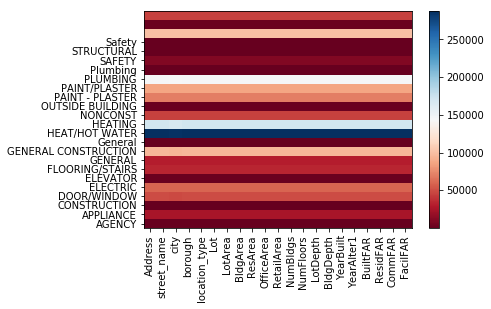

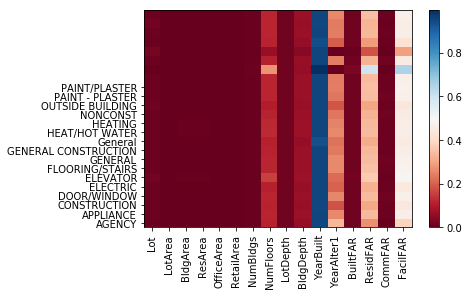

In [12]:

#df_hpd_pluto_bronx_groupby_complaint_type.drop(['unique_key'],axis=1,inplace =True)
import seaborn as sn
#Function defination to plot grouped_by data set
def plot_grouby_df(data_frame):
    #plt.pcolor(data_frame,cmap='RdBu')
    #plt.colorbar()
    #plt.show()
    #labels
    fig,ax = plt.subplots()
    im = ax.pcolor(data_frame,cmap='RdBu')
    row_labels = data_frame.columns
    col_labels = data_frame.index
    ax.set_xticks(np.arange(data_frame.shape[1])+0.5,minor=False)
    ax.set_yticks(np.arange(data_frame.shape[1])+0.5,minor=False)
    ax.set_xticklabels(row_labels,minor=False)
    ax.set_yticklabels(col_labels,minor=False)
    plt.xticks(rotation=90)
    plt.xticks(rotation=90)
    fig.colorbar(im)
    plt.show()
#Calling plot_grouby_df method to visualize 
plot_grouby_df(df_hpd_pluto_bronx_groupby_complaint_type1)
#We can observe from the plot1 that HEAT/HOT WATER problem top the complaint list with dark blue(250000)
plot_grouby_df(df_hpd_pluto_bronx_groupby_complaint_type2)
#We can observe from the plot2 that year built,bldgDepth,FacilFAR,LotDepth,NumbBldgs
#had same mean (same vertical color bar )across all complaint_types
#Lets do further analysis using statitics


## 2.b.Statistical analysis

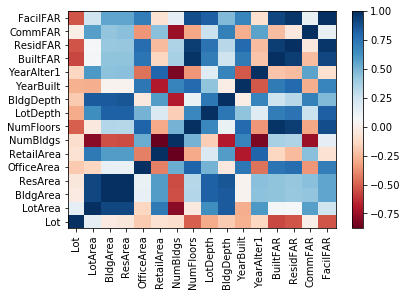

In [13]:
#Do the Statistical analysis by using correalation among the futuers of PLUTO
df_hpd_pluto_bronx_groupby_complaint_type3=df_hpd_pluto_bronx_groupby_complaint_type2.corr()
df_hpd_pluto_bronx_groupby_complaint_type3
#Calling plot_grouby_df method to visualize correlation among features of pluto
plot_grouby_df(df_hpd_pluto_bronx_groupby_complaint_type3)
#It is clear that year built,bldgDepth,FacilFAR,LotDepth,NumbFloors Higly correalated with othervariables
#so their group mean is low,it confirms our first visuval analysis

In [16]:
#Test diffrences btw the means of groups(buildings,complaint_types) with metrics f,p values
from scipy import stats as stat
columns_selected3 = ['BldgArea','BldgDepth','BuiltFAR','CommFAR','FacilFAR','Lot','LotArea',
                     'LotDepth','NumBldgs','NumFloors','OfficeArea','ResArea','ResidFAR','RetailArea',
                     'YearBuilt','YearAlter1']
def anova_oneway(column):
    f_val,p_val= stat.f_oneway(df_hpd_pluto_bronx_groupby_complaint_type.get_group('AGENCY')[column],df_hpd_pluto_bronx_groupby_complaint_type.get_group('APPLIANCE')[column],
                               df_hpd_pluto_bronx_groupby_complaint_type.get_group('CONSTRUCTION')[column],df_hpd_pluto_bronx_groupby_complaint_type.get_group('DOOR/WINDOW')[column],
                               df_hpd_pluto_bronx_groupby_complaint_type.get_group('ELECTRIC')[column],df_hpd_pluto_bronx_groupby_complaint_type.get_group('ELEVATOR')[column],
                               df_hpd_pluto_bronx_groupby_complaint_type.get_group('FLOORING/STAIRS')[column],df_hpd_pluto_bronx_groupby_complaint_type.get_group('GENERAL')[column],
                               df_hpd_pluto_bronx_groupby_complaint_type.get_group('GENERAL CONSTRUCTION')[column],df_hpd_pluto_bronx_groupby_complaint_type.get_group('HEAT/HOT WATER')[column],
                               df_hpd_pluto_bronx_groupby_complaint_type.get_group('HEATING')[column],df_hpd_pluto_bronx_groupby_complaint_type.get_group('NONCONST')[column],
                               df_hpd_pluto_bronx_groupby_complaint_type.get_group('OUTSIDE BUILDING')[column],df_hpd_pluto_bronx_groupby_complaint_type.get_group('PAINT - PLASTER')[column],
                               df_hpd_pluto_bronx_groupby_complaint_type.get_group('PAINT/PLASTER')[column],df_hpd_pluto_bronx_groupby_complaint_type.get_group('PLUMBING')[column],
                               df_hpd_pluto_bronx_groupby_complaint_type.get_group('SAFETY')[column],df_hpd_pluto_bronx_groupby_complaint_type.get_group('STRUCTURAL')[column],
                               df_hpd_pluto_bronx_groupby_complaint_type.get_group('UNSANITARY CONDITION')[column],df_hpd_pluto_bronx_groupby_complaint_type.get_group('WATER LEAK')[column])
    print(column,': F-val:',f_val,'P-val:',p_val)
#Calling anova method
for column in columns_selected3:
    anova_oneway(column)
#From the results of anova_oneway test it is understood that all features had very low p-val nad high f-val
#There is high correlation between building features and complaint_types.

BldgArea : F-val: 230.14793376600852 P-val: 0.0
BldgDepth : F-val: 243.39625105785385 P-val: 0.0
BuiltFAR : F-val: 124.82954239742003 P-val: 0.0
CommFAR : F-val: 27.231294029636647 P-val: 1.3099634834181875e-97
FacilFAR : F-val: 101.84522440172937 P-val: 0.0
Lot : F-val: 17.038053824402105 P-val: 2.7346287519058536e-57
LotArea : F-val: 113.17197358579828 P-val: 0.0
LotDepth : F-val: 266.4562855261722 P-val: 0.0
NumBldgs : F-val: 6.615884053134202 P-val: 9.465861729366521e-18
NumFloors : F-val: 410.5275317668504 P-val: 0.0
OfficeArea : F-val: 16.10129107491888 P-val: 1.2402550731815518e-53
ResArea : F-val: 220.0981741292381 P-val: 0.0
ResidFAR : F-val: 121.14939660062596 P-val: 0.0
RetailArea : F-val: 13.178874762259436 P-val: 2.5976531797340448e-42
YearBuilt : F-val: 13.812221144164981 P-val: 9.416037070386035e-45
YearAlter1 : F-val: 62.648796059912996 P-val: 1.4319274210383694e-240


## 3.Conclusion

### From both Visual analysis and Statistical analysis we can conclude that the follwing building features had correlation with complaint_types.
    1.BldgArea 
    2.BldgDepth 
    3.BuiltFAR 
    4.CommFAR 
    5.FacilFAR 
    6.Lot 
    7.LotArea 
    8.LotDepth 
    9.YearAlter1 
    10.NumFloors 
    11.OfficeArea 
    12.ResArea 
    13.ResidFAR 
    14.RetailArea 
    


#### Scripted By: Venkat Alapati